In [33]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.optimizers import SGD
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [20]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


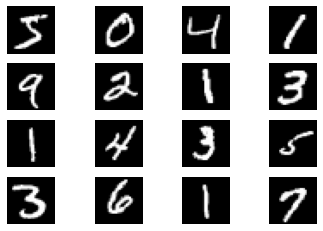

In [21]:
# Plot first few images
img_index = 0
f, axarr = plt.subplots(4, 4)

for x, y in np.ndindex((4, 4)):
  axarr[x,y].imshow(X_train[img_index], cmap=plt.get_cmap('gray'))
  axarr[x,y].axis("off")
  img_index += 1
 
plt.show()

In [22]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
# Reshape data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [24]:
# Use one hot encoding to transform the labels to data that the model can understand
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [25]:
# Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [40]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(y_train.shape[1], activation='softmax'))

opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
  datagen.flow(X_train, y_train, batch_size=250),
  epochs=20,
  validation_data=(X_test, y_test)
)

Epoch 1/20
240/240 [==============================] - 17s 66ms/step - loss: 1.1522 - accuracy: 0.6479 - val_loss: 0.1845 - val_accuracy: 0.9507
Epoch 2/20
240/240 [==============================] - 15s 61ms/step - loss: 0.2384 - accuracy: 0.9262 - val_loss: 0.0607 - val_accuracy: 0.9816
Epoch 3/20
240/240 [==============================] - 15s 64ms/step - loss: 0.1755 - accuracy: 0.9459 - val_loss: 0.0945 - val_accuracy: 0.9707
Epoch 4/20
240/240 [==============================] - 15s 61ms/step - loss: 0.1505 - accuracy: 0.9526 - val_loss: 0.0684 - val_accuracy: 0.9781
Epoch 5/20
240/240 [==============================] - 15s 62ms/step - loss: 0.1298 - accuracy: 0.9592 - val_loss: 0.0866 - val_accuracy: 0.9732
Epoch 6/20
240/240 [==============================] - 15s 65ms/step - loss: 0.1155 - accuracy: 0.9640 - val_loss: 0.0463 - val_accuracy: 0.9849
Epoch 7/20
240/240 [==============================] - 15s 61ms/step - loss: 0.1069 - accuracy: 0.9662 - val_loss: 0.0484 - val_accuracy:

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)         

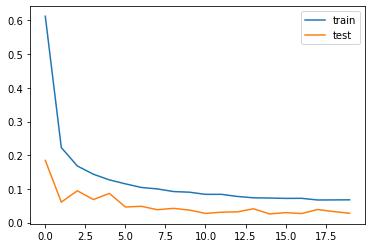

In [42]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0278 - accuracy: 0.9911


[0.02776077203452587, 0.991100013256073]

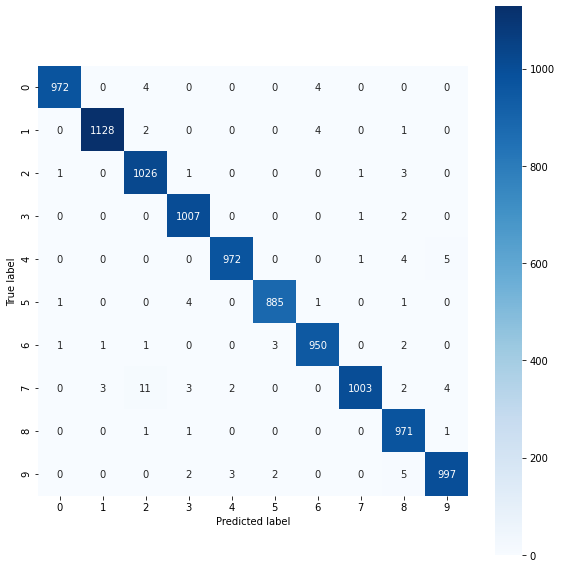

In [44]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

y_test_round = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_round, y_pred)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, square=True, fmt="")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()